## EDA on Haberman's  Cancer Survival Dataset :

### Data description:

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer. 
You can find the dataset at:
'https://www.kaggle.com/gilsousa/habermans-survival-data-set'

### Attributes Information:
- Age of patient at time of operation (numerical) 
- Patient's year of operation (year - 1900, numerical) 
- Number of positive axillary nodes detected (numerical) 
- Survival status (class attribute):
  - 1 = the patient survived 5 years or longer 
  - 2 = the patient died within 5 year 

### Objective:
To visualize and analyse the dataset and identify the important features affecting the survival status column.
This is done by comparing the columns using various univariate, bivariate and multivariate visualization techniques and come to a conclusion.

In [1]:
#importing the libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the dataset

df = pd.read_csv("haberman.csv")
print(df.head())

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1


In [3]:
print(df.shape)

(306, 4)


In [4]:
print(df.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [5]:
df['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


####  Observations:

- Dataset has 306 rows,4 columns with no null values. All the columns are of integer datatype.
- Integer datatype of status column has to be converted into object datatype. 
- In the status column, the value 1 can be mapped to ‘yes’ which means the patient has survived 5 years or longer. 
And the value 2 can be mapped to ‘no’ which means the patient died within 5 years.
- Year column values can be prefixed with '19' so that we are not confused. (eg: year'68 becomes 1968.)

In [7]:
#Transforming the column values from 1,2 in status column to 'yes,no' respectively.

df['status']=df['status'].map({ 1:'yes',2:'no'})

In [8]:
#Adding prefix '19' to year values. (eg: year'68 changes to 1968)
df['year']= ('19'+df['year'].map(str)).map(int)

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     306 non-null    int64 
 1   year    306 non-null    int64 
 2   nodes   306 non-null    int64 
 3   status  306 non-null    object
dtypes: int64(3), object(1)
memory usage: 9.7+ KB
None


In [10]:
df['status'].value_counts()

yes    225
no      81
Name: status, dtype: int64

In [11]:
df.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,1962.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,1958.000000,0.000000
25%,44.000000,1960.000000,0.000000
50%,52.000000,1963.000000,1.000000
75%,60.750000,1965.750000,4.000000
max,83.000000,1969.000000,52.000000


In [12]:
status_yes = df[df['status']=='yes']
status_yes.describe()
#status_yes dataframe stores all the records where status is yes

,age,year,nodes
count,225.000000,225.000000,225.000000
mean,52.017778,1962.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,1958.000000,0.000000
25%,43.000000,1960.000000,0.000000
50%,52.000000,1963.000000,0.000000
75%,60.000000,1966.000000,3.000000
max,77.000000,1969.000000,46.000000


In [13]:
status_no = df[df['status']=='no']
status_no.describe()

,age,year,nodes
count,81.000000,81.000000,81.000000
mean,53.679012,1962.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,1958.000000,0.000000
25%,46.000000,1959.000000,1.000000
50%,53.000000,1963.000000,4.000000
75%,61.000000,1965.000000,11.000000
max,83.000000,1969.000000,52.000000


####  Observations:


-  Out of 306 rows,target column df['status'] has 225 patients who survived for 5 years or longer and only 81 patients who did not. This shows that the dataset is imbalanced.

- The mean and median values of age and year column are approximately same . Hence there can be no outliers.
- The average age of patients who survived is almost 1.5 years less than those who didn't survive.

- More than 50% of cancer patients who survived are found with 0 axillary nodes which says cancer is detected early in their bodies,hence zero nodes and higher chance of survival.

- Whereas only 25% of patients who survived have more than 4 axillary nodes and almost 50% of cancer patients who didn't survive are found with atleast 4 axillary nodes, which might be the reason why there are more patients who survived than those who didn't. We have to confirm this with further visualization analysis.

- The mean of the nodes of both the classes(survived and not survived) differs by 5 units approximately. The only  potential conclusion that can be drawn from these observations is that the nodes of those who survived is less than nodes of those who didn't survive.


### Univariate Plots

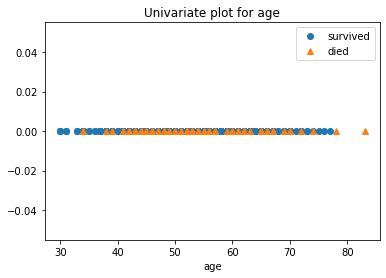

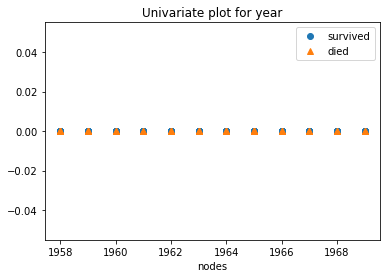

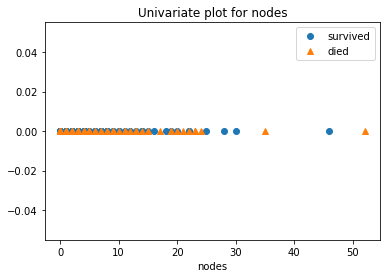

In [16]:
#1-D Scatter plots

plt.plot(status_yes['age'], np.zeros_like(status_yes['age']), 'o')
plt.plot(status_no['age'], np.zeros_like(status_no['age']), '^')
plt.xlabel('age')
plt.title('Univariate plot for age')
plt.legend((('survived','died')))
plt.show()
plt.plot(status_yes['year'], np.zeros_like(status_yes['year']), 'o')
plt.plot(status_no['year'], np.zeros_like(status_no['year']), '^')
plt.xlabel('nodes')
plt.title('Univariate plot for year')
plt.legend((('survived','died')))
plt.show()
plt.plot(status_yes['nodes'], np.zeros_like(status_yes['nodes']), 'o')
plt.plot(status_no['nodes'], np.zeros_like(status_no['nodes']), '^')
plt.xlabel('nodes')
plt.title('Univariate plot for nodes')
plt.legend((('survived','died')))
plt.show()

### Observations:
- No proper conclusions can be drawn as most ot the points are overlapping with each other.
- But we can say from age graph, people with age less than 40 have higher chances of survival.

### Probability Density Function (PDF)

- The value on the y-axis shows the corresponding probability of having value of x-axis.

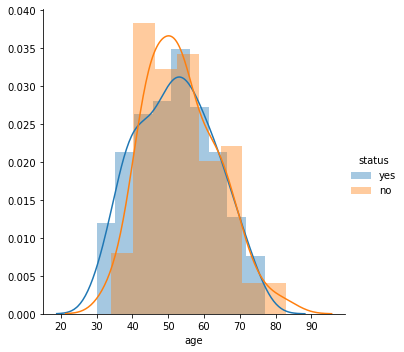

In [17]:
sns.FacetGrid(df,hue='status',height=5).map(sns.distplot,'age').add_legend()

#### Observations:
- Although there is major overlapping among the two groups, as observed earlier people of age 30-40 have higher chances of survival where as people of age 40-60 have slightly less likely to survive. And people above 60 have equal chances of survival and not survival.
- We can perform further analysis and draw a confident conclusion.

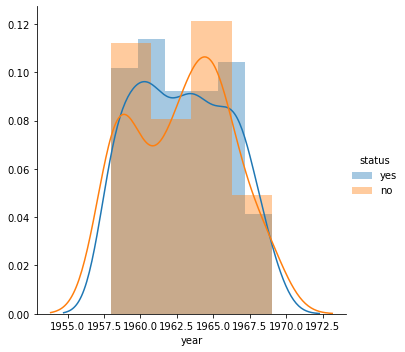

In [18]:
sns.FacetGrid(df,hue='status',height=5).map(sns.distplot,'year').add_legend()

#### Observations:
- Again, most of the observations are overlapping one another. But we can say there are more failed operations in the year 1965 than any other years.
- And the total operations done from year 1966 are less compared to previous years. This may mean the number of breast cancer cases are reducing from 1965. We can be more confident about this statement if we have additional data for later years.

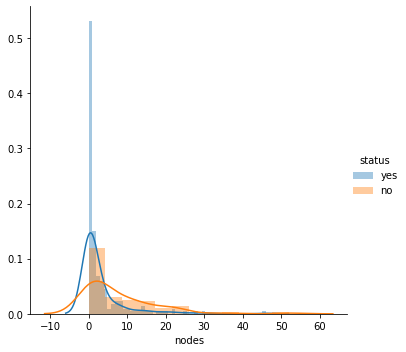

In [19]:
sns.FacetGrid(df,hue='status',height=5).map(sns.distplot,'nodes').add_legend()

#### Observations:
- Plot shows the patients having zero nodes have significantly higher chance of survival than any others.
- Also, patients with nodes greater than 5 have higher chances of not surviving.

### Cumulative Distribution Function(CDF)
- The value on the y-axis shows the corresponding cumulative probability of having value of x-axis.

pdf1: [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
cdf1: [0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]
---------------------------------------------------------------------------
pdf2: [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
cdf2: [0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


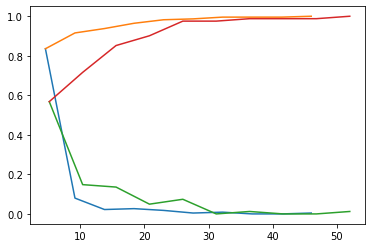

In [20]:
counts1,bin_edges1 = np.histogram(status_yes['nodes'],bins=10,density=True)
pdf1 = counts1/sum(counts1)
print('pdf1:', pdf1)
print(bin_edges1)
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:],pdf1)
plt.plot(bin_edges1[1:],cdf1,label = 'yes')
print('cdf1:', cdf1)
print('-'*75)
counts2,bin_edges2 = np.histogram(status_no['nodes'],bins=10,density=True)
pdf2 = counts2/sum(counts2)
print('pdf2:', pdf2)
print(bin_edges2)
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges2[1:],pdf2)
plt.plot(bin_edges2[1:],cdf2,label = 'no')
print('cdf2:', cdf2)

#### Observations:
- There is almost 83% probability that people having nodes less than 4.6 will survive.


## Bivariate Plots & Multivariate Plots

### Box Plots and Violin Plots:
- The box extends from the lower to upper quartile values of the data, with a line at the median. The whiskers extend from the box to show the range of the data. Outlier points are those past the end of the whiskers.
Violin plot is the combination of a box plot and probability density function(PDF).

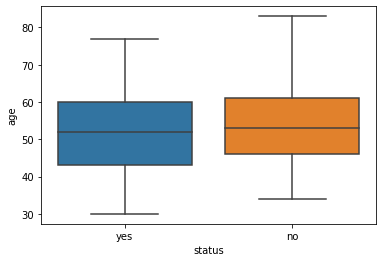

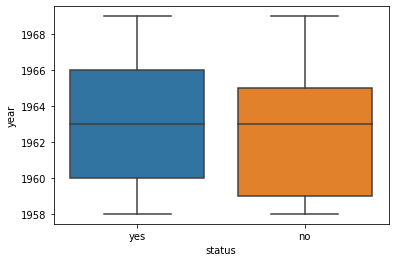

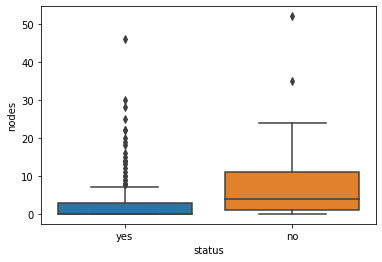

In [21]:
sns.boxplot(x='status',y='age',data = df)
plt.show()
sns.boxplot(x = 'status',y='year',data = df)
plt.show()
sns.boxplot(x='status',y='nodes',data = df)
plt.show()

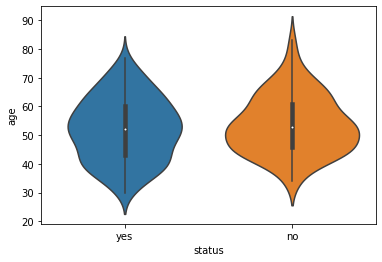

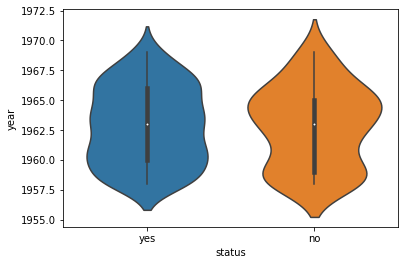

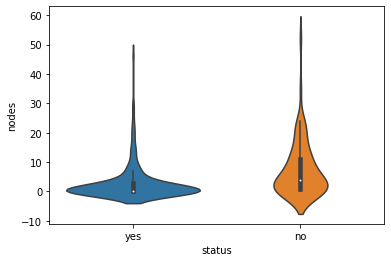

In [22]:
sns.violinplot(x='status',y='age',data = df)
plt.show()
sns.violinplot(x = 'status',y='year',data = df)
plt.show()
sns.violinplot(x='status',y='nodes',data = df)
plt.show()

### Observations:
- From the above plots, our previous observations seems to be reiterated.
- People of age less than 35 can survive breast cancer. This might vary if more number of observations of people who didn't survive are provided. 
- The patients who gad undergone treatment before 1966 had higher chance of not surviving for more than five years than those who had undergone the treatment after 1965.
- The data which we have is significantly overlapping in all parameters making it difficult to come to any solid conclusion.

### Scatter Plots

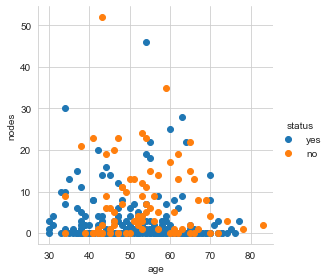

In [23]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="status", size=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();

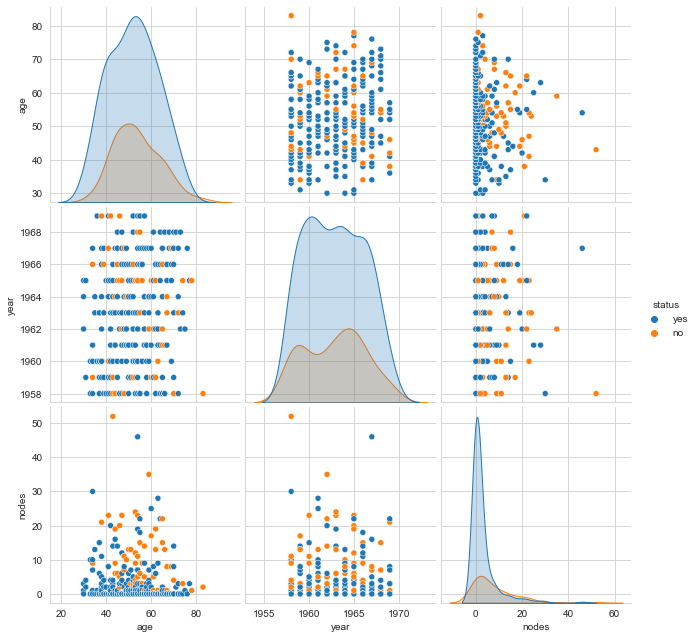

In [24]:
# Pairwise scatter plot: Pairplot
plt.close()
sns.set_style("whitegrid")
sns.pairplot(df,hue='status',vars=['age','year','nodes'],height = 3)


#### Observations:
- From above nodes,age pairplot, we can observe patients having age < 40 and nodes < 4.5 survived majority of the time.
- From year,age pairplot, we can observe patients having age < 40 and had treatment before 1965 survived majority of the time.
- From nodes,year pairplot, we can observe number of patients who got treatment of cancer after 1966 are comparitively less than those patients before 1965 and most of them having nodes less than 6 survived.

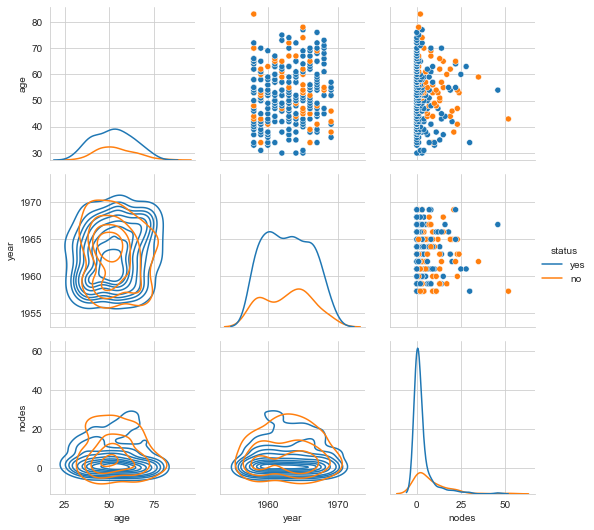

In [25]:
g=sns.PairGrid(df,hue='status')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot,legend = True)
g.add_legend()

## Conclusions:

- Since the dataset is imbalanced and is skewed towards people surviving even after 5 years of their breast cancer surgery, most of our limited observations were identified as under which conditions these patients survived.
- This doesn't rule out the probability that patients may not survive given the same conditions. Perhaps,if we were provided with more data about people who didn't survive after 5 years or data which isn't overlapping in almost all the attributes, we might be able to draw more better conclusions.

- However, among the attributes of age,year and auxillary nodes, auxillary nodes seems to provide us some better information compared to the rest. We have identified, people with 0 nodes survive most the time and people having less than 5 nodes survive 83% of the time.

- Also, people having age less than 40 are high likely to survive compared to those above 40. 

- Patients who had undergone surgery before 1965 had high chance of not survivng compared to those who had surgery after 1966. 
- The total number of breast surgery patients also decreased post 1966 indicating may be due better medical treatments. We can only prove this claim if we have more data for the later years.
